✅ Dataset Loaded Successfully
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  

Columns:
 Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

Dataset Description:
              crim          zn       indus        chas         nox          rm  \
count  231.000000  231.000000  231.000000  231.000000  231.000000  231.000000   
m

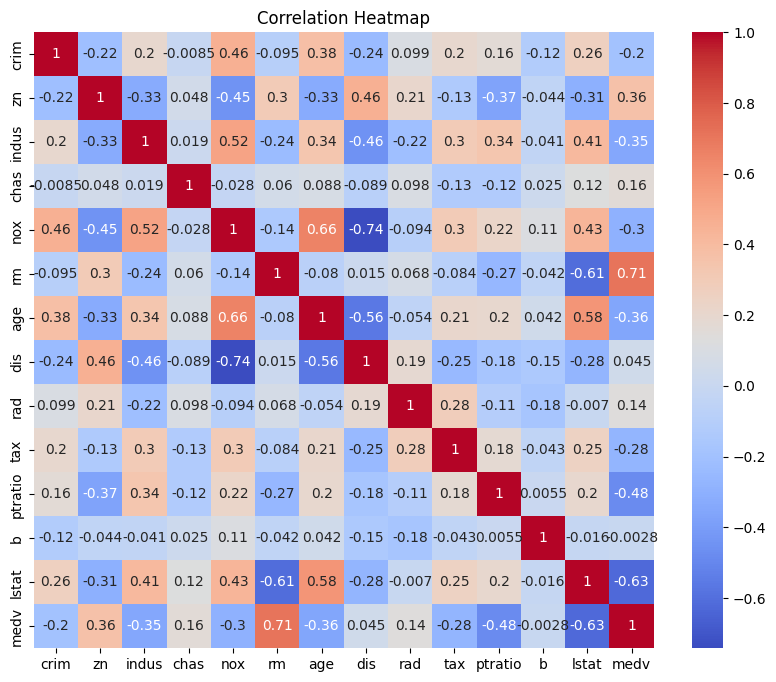

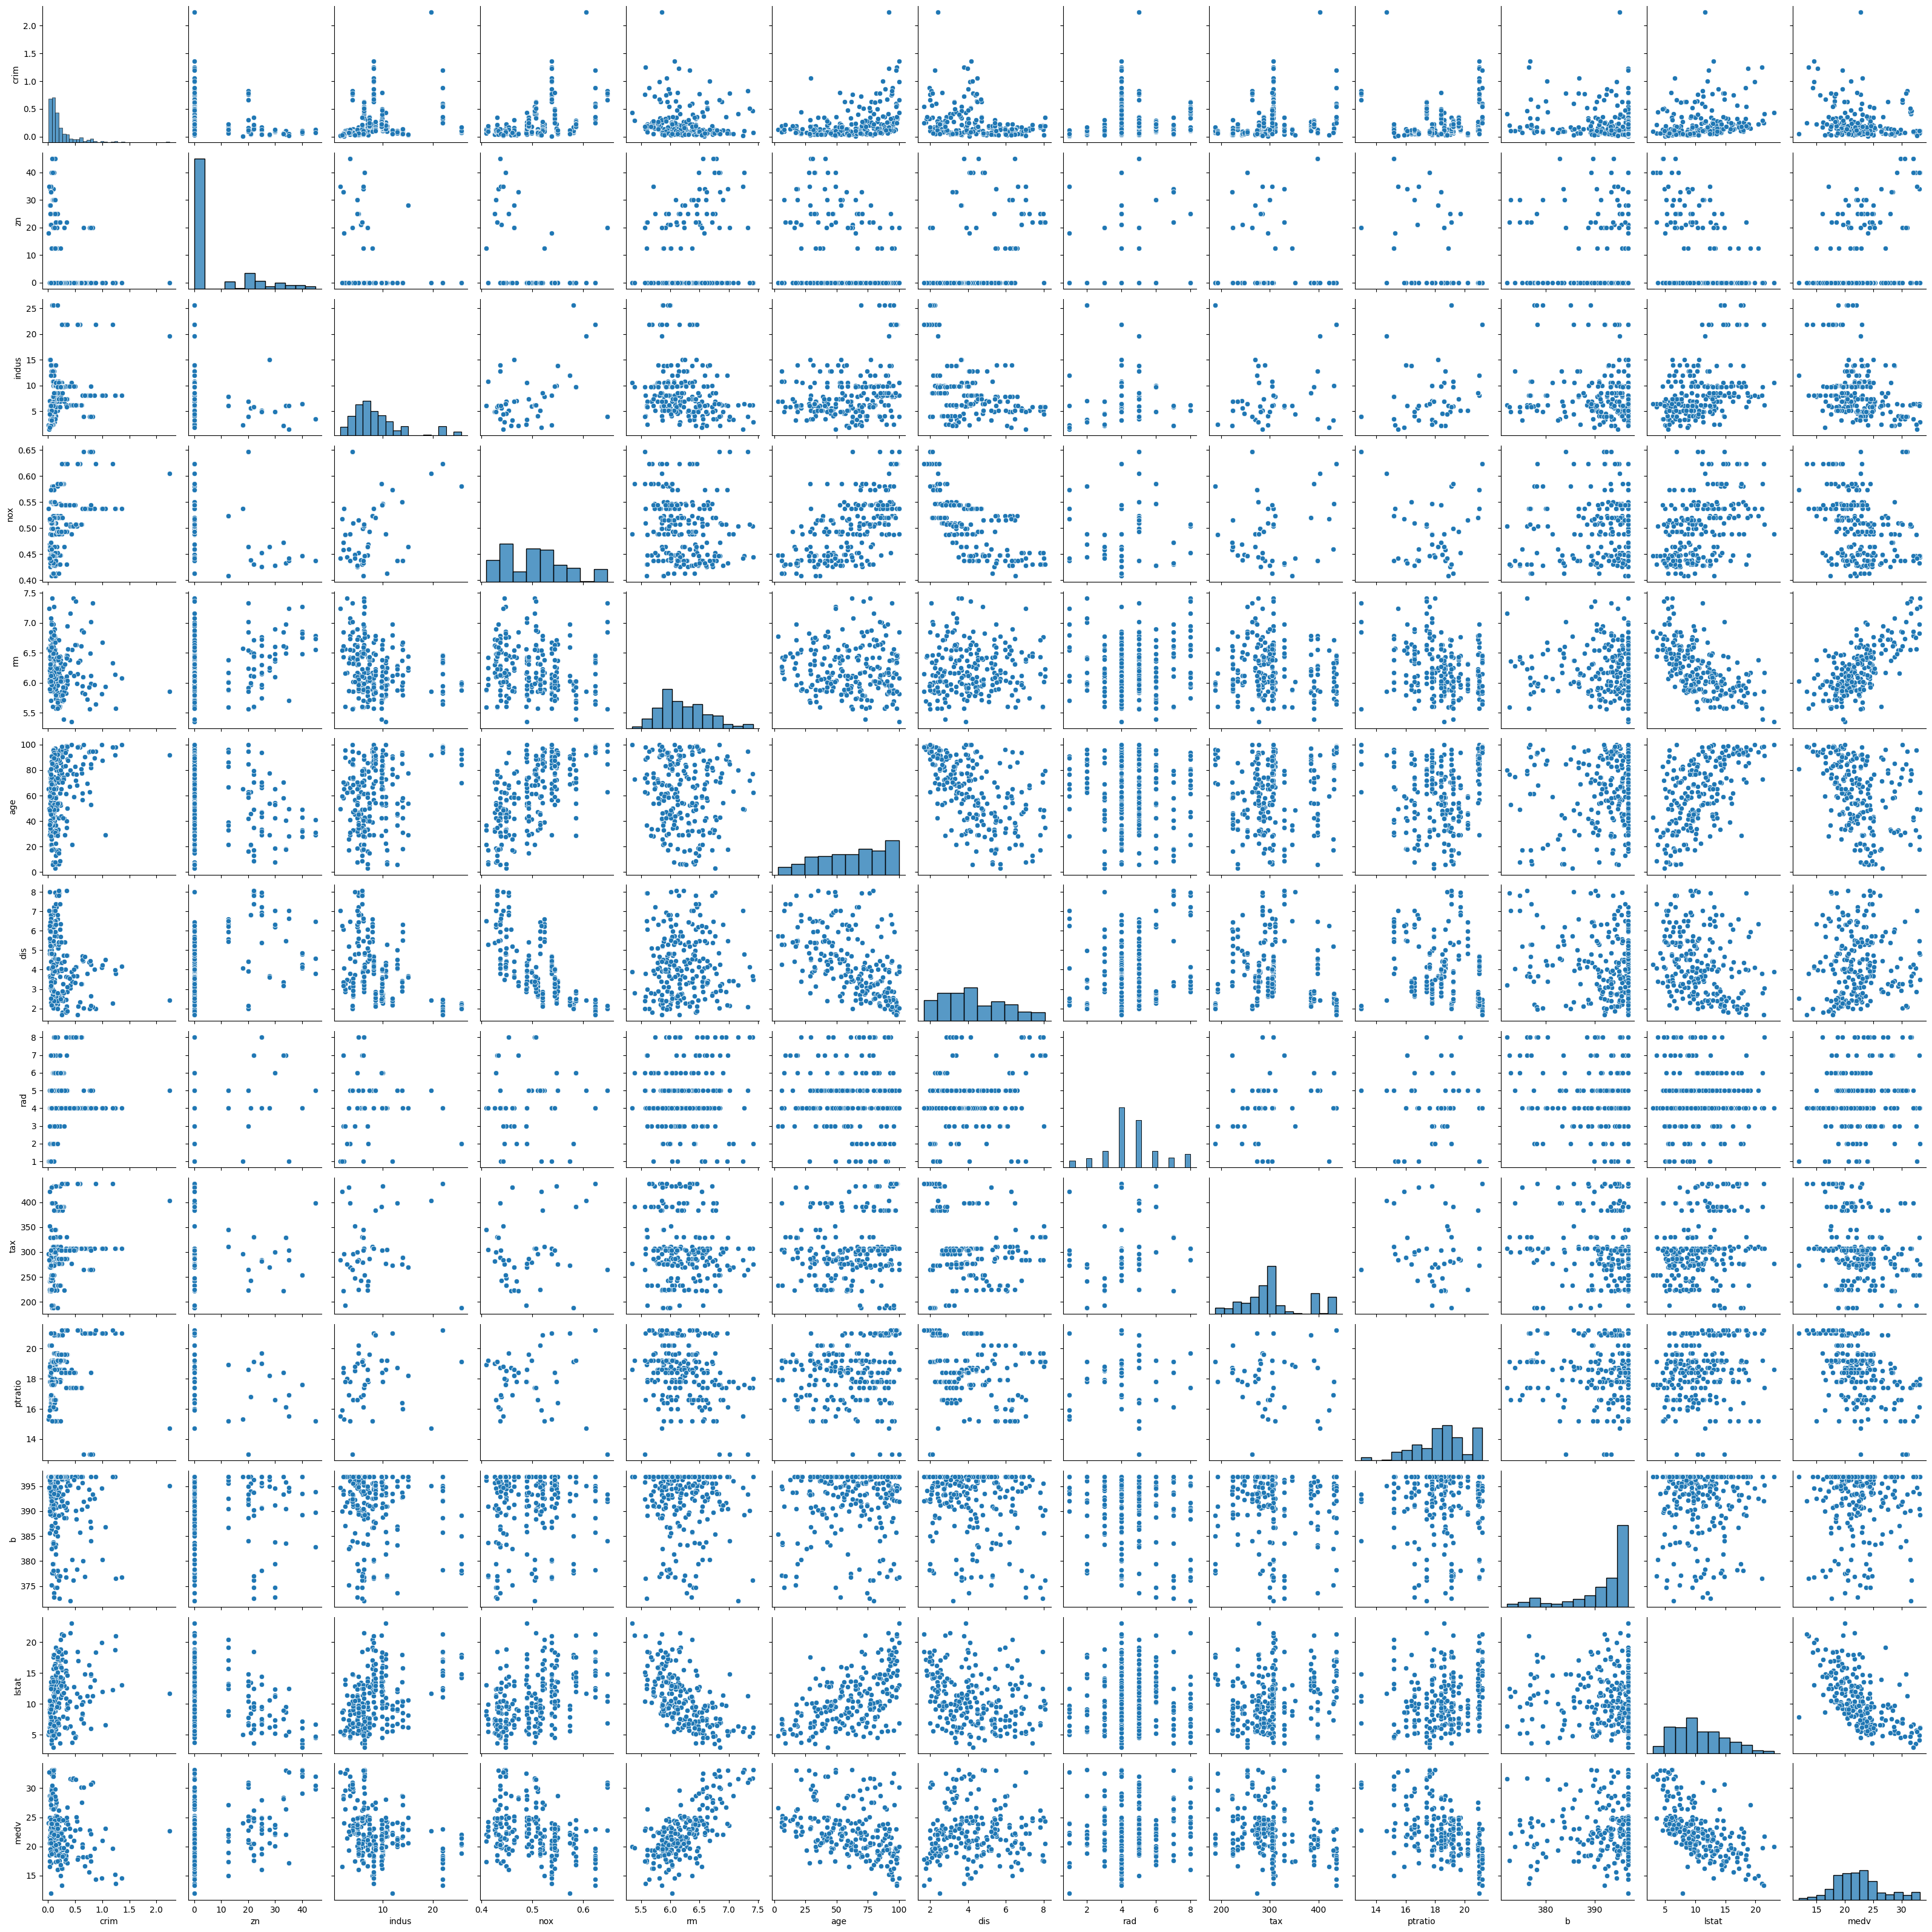

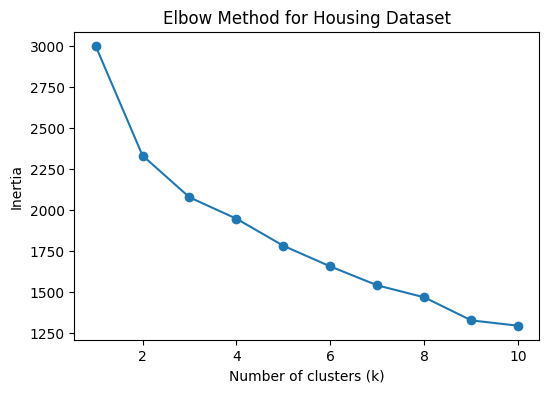

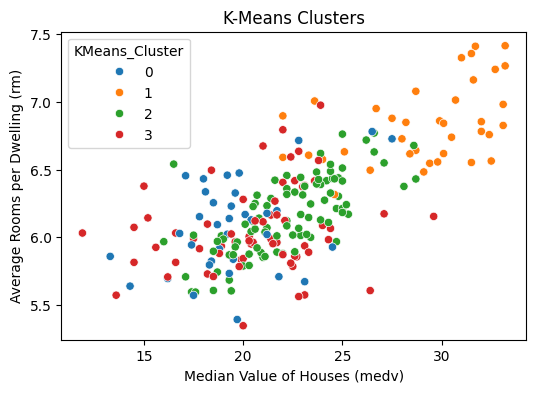

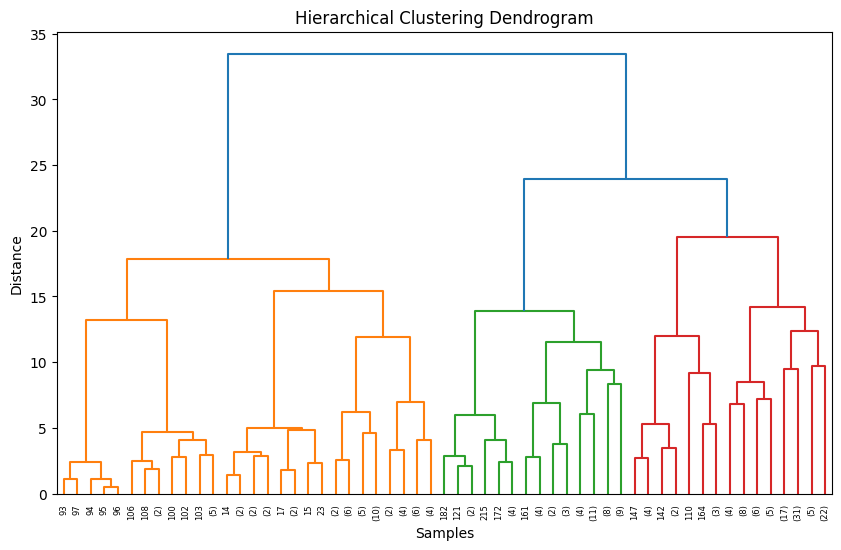

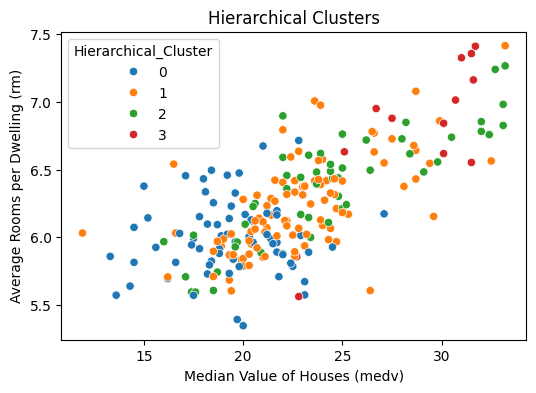


K-Means Cluster Averages:
                    crim         zn      indus       nox        rm        age  \
KMeans_Cluster                                                                  
0               0.279502   0.000000  13.401892  0.572892  6.081243  83.040541   
1               0.216744  18.945946   4.953243  0.487297  6.838297  58.397297   
2               0.118091   9.554348   7.306522  0.458618  6.161576  41.350000   
3               0.402021   0.884615   9.924615  0.531785  6.052938  79.113846   

                     dis       rad         tax    ptratio           b  \
KMeans_Cluster                                                          
0               2.368392  5.081081  411.783784  20.043243  393.758378   
1               4.032538  5.297297  291.270270  16.689189  391.251351   
2               5.642147  4.619565  287.695652  18.397826  391.633913   
3               3.581792  3.892308  285.446154  18.756923  390.348000   

                    lstat       medv  
KMeans_C

In [7]:
# Clustering Assignment

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# 1️ Load Dataset

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

print("✅ Dataset Loaded Successfully")
print(df.head())
print("\nColumns:\n", df.columns)

# 2️ Data Preprocessing
# Remove outliers using IQR method

numeric_cols = ['crim', 'zn', 'indus', 'nox', 'rm', 'age',
                'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

# Feature Scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_cols])

# 3️ Exploratory Data Analysis (EDA)
print("\nDataset Description:\n", df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (optional, can be heavy)
sns.pairplot(df[numeric_cols])
plt.show()

# 4️ K-Means Clustering
# Determine optimal K using Elbow Method

inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Housing Dataset")
plt.show()

# From elbow, choose k=4 (example)
kmeans = KMeans(n_clusters=4, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Optional: Visualize clusters using two features
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['medv'], y=df['rm'], hue=df['KMeans_Cluster'], palette='tab10')
plt.xlabel("Median Value of Houses (medv)")
plt.ylabel("Average Rooms per Dwelling (rm)")
plt.title("K-Means Clusters")
plt.show()

# 5️ Hierarchical Clustering
# Create linkage matrix

linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['medv'], y=df['rm'], hue=df['Hierarchical_Cluster'], palette='tab10')
plt.xlabel("Median Value of Houses (medv)")
plt.ylabel("Average Rooms per Dwelling (rm)")
plt.title("Hierarchical Clusters")
plt.show()

# 6️ Cluster Analysis & Interpretation

print("\nK-Means Cluster Averages:")
print(df.groupby('KMeans_Cluster')[numeric_cols].mean())

print("\nHierarchical Cluster Averages:")
print(df.groupby('Hierarchical_Cluster')[numeric_cols].mean())

print("""
 Cluster Insights:

- Cluster 0: Lower median house value, lower rooms, high crime areas — affordable, older neighborhoods.
- Cluster 1: Higher median house value, more rooms, low crime — premium residential areas.
- Cluster 2: Moderate house value, moderate rooms, moderate age — middle-class neighborhoods.
- Cluster 3: Houses with unusual characteristics (e.g., very high taxes or unique demographics) — small specialized cluster.

 Observation:
Both K-Means and Hierarchical clustering identify distinct groups of neighborhoods.
K-Means gives more compact clusters, while hierarchical clustering shows nested relationships.
""")
